In [3]:
!conda install -c conda-forge -y iris

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::bkcharts==0.2=py36_0
  - defaults/noarch::dask==2.14.0=py_0
  - defaults/noarch::numpydoc==0.9.2=py_0
  - defaults/linux-64::pytest-arraydiff==0.3=py36h39e3cac_0
  - defaults/linux-64::bottleneck==1.3.2=py36heb32a55_0
  - defaults/linux-64::pywavelets==1.1.1=py36h7b6447c_0
  - defaults/noarch::pytest-astropy==0.8.0=py_0
  - defaults/linux-64::numexpr==2.7.1=py36h423224d_0
  - defaults/linux-64::h5py==2.10.0=py36h7918eee_0
  - defaults/linux-64::python-language-server==0.31.9=py36_0
  - defaults/linux-64::pandas==1.0.5=py36h0573a6f_0
  - defaults/linux-64::numpy-base==1.18.1=py36hde5b4d6_1
  - defaults/noarch::s3fs==0.4.0=py_0
  - defaults/linux-64::patsy==0.5.1=py36_0
  - defaults/linux-64::scikit-image==0.16.2=py36h0573a6f_0
  - defaults/linux-64::matplotlib-base==3.1.3=py36hef1b27d_0
  - defaults/linux-64::pytab

In [4]:
#Here I will work on "rainfaLL_rate" data
#import libraries
import boto3
import json
import urllib.request
import iris

In [5]:
#connect to sqs 
sqs = boto3.client('sqs', region_name='eu-west-2')

In [6]:
#creating an empty set to add files that contain rainfall_rate data
rainfall_rate = set()
#function to connect to queue and identify files that contain rainfall_rate data and adding those to set created earlier
#the queue created has following settings
#visibility timeout: 10 secs
#delivery delay : 5 min
#receive message wait time : 20 secs
#message retention period : 1 day
#Access Policy : Basic
#Who can send/receive messages to/from queue: only owner
#subscription : arn:aws:sns:eu-west-2:021908831235:aws-earth-mo-atmospheric-mogreps-uk-prd
#tag : environment/awstakehome
#Note** Deleted subscription to avoid more messages in queue while testing..

def sqsfunc():
    messages = sqs.receive_message(
    QueueUrl='https://sqs.eu-west-2.amazonaws.com/443602378074/MyQueueNew',
    MaxNumberOfMessages=10)
    for i in messages['Messages']:
        x = json.loads(i['Body'])
        y = json.loads(x['Message'])
        if y['name'] == "rainfall_rate":
            rainfall_rate.add(y["key"])
            print('rainfall_rate has now ' + str(len(rainfall_rate)) + ' files')
        return rainfall_rate

In [8]:
#run multiple times to get multiple files or atleast till set has one file
#will customize this to run in automated fashion in later stages

#sqsfunc()

In [213]:
#function to download files
def download_data_object(rainfall_rate):
    for i in rainfall_rate:
        url = "https://s3.eu-west-2.amazonaws.com/" + "aws-earth-mo-atmospheric-mogreps-uk-prd" + "/" + i
        urllib.request.urlretrieve(url, i)

In [214]:
download_data_object(rainfall_rate)

In [9]:
rainfall_rate

set()

In [10]:
#converting set to list
rainfall_rate = list(rainfall_rate)

In [13]:
rainfall_rate

['dce6019f27ab15b05daac6c85f47b5993268d8c3.nc']

In [14]:
#selecting one file
for i in rainfall_rate[0:1]:
    filename = i
    listofcubes = iris.load(filename)
    cube = listofcubes[0]
    print("--filename: " + i)
    print("--listofcubes in file: \n" ,listofcubes,end="\n--Printing Cube now\n")
    print(cube)
    realization = cube.coord('realization').points
    projection_y = cube.coord('projection_y_coordinate').points
    projection_x = cube.coord('projection_x_coordinate').points
   

--filename: dce6019f27ab15b05daac6c85f47b5993268d8c3.nc
--listofcubes in file: 
 0: rainfall_rate / (m s-1)             (realization: 3; projection_y_coordinate: 970; projection_x_coordinate: 1042)
--Printing Cube now
rainfall_rate / (m s-1)             (realization: 3; projection_y_coordinate: 970; projection_x_coordinate: 1042)
     Dimension coordinates:
          realization                           x                           -                             -
          projection_y_coordinate               -                           x                             -
          projection_x_coordinate               -                           -                             x
     Scalar coordinates:
          forecast_period: 388800 seconds
          forecast_reference_time: 2020-09-16 10:00:00
          time: 2020-09-20 22:00:00
     Attributes:
          Conventions: CF-1.5, UKMO-1.0
          history: 2020-09-16T12:34:46Z: StaGE Decoupler
          institution: Met Office
          

In [15]:
#number of dimensions for 'realization'
realization.size

3

In [16]:
#looking at values in 'realization'
print(realization)

[15 16 17]


In [17]:
#number of dimensions for projection_y_coordinate i.e. rows
projection_y.size

970

In [19]:
#number of dimensions for projection_x_coordinate i.e. columns
projection_x.size

1042

In [20]:
#cube dimensions
cube.ndim

3

In [21]:
#looking at shape
cube.shape

(3, 970, 1042)

In [22]:
 #Reducing dimension from 3d to 2d cube and plotting considering realization
extracted_cube = cube.extract(iris.Constraint(realization=15))

In [23]:
extracted_cube.ndim

2

In [24]:
extracted_cube

<iris 'Cube' of rainfall_rate / (m s-1) (projection_y_coordinate: 970; projection_x_coordinate: 1042)>

In [25]:
#plotting our rainfall_rate data
import matplotlib.pyplot as plt
#import iris.quickplot as qplt

In [210]:
extracted_cube.shape
#shows 970 rows(projection_y_coordinate),1042 columns(projection_x_coordinate)

(970, 1042)

In [30]:
#confirming
len(projection_x)

1042

In [31]:
#confirming
len(projection_y)

970

In [70]:
#plotting for one realization
 #Reducing dimension from 3d to 2d cube and plotting considering realization

extracted_cube = cube.extract(iris.Constraint(realization=15))
import pandas as pd
cubedf = pd.DataFrame(extracted_cube.data,columns=[projection_x])
cubedf.head(2)


,-1158000.0,-1156000.0,-1154000.0,-1152000.0,-1150000.0,-1148000.0,-1146000.0,-1144000.0,-1142000.0,-1140000.0,...,906000.0,908000.0,910000.0,912000.0,914000.0,916000.0,918000.0,920000.0,922000.0,924000.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
#our column names (longitudes in RotatedGeogCS coordinates system)
projection_x[0:5]

array([-1158000., -1156000., -1154000., -1152000., -1150000.],
      dtype=float32)

In [72]:
#our row names (latitudes in RotatedGeogCS coordinates system) is now replaced with default index values
projection_y[0:5]

array([-1036000., -1034000., -1032000., -1030000., -1028000.],
      dtype=float32)

In [76]:
print(len(projection_x)),print(cubedf.index),print(cubedf.shape)

1042
RangeIndex(start=0, stop=970, step=1)
(970, 1042)


(None, None, None)

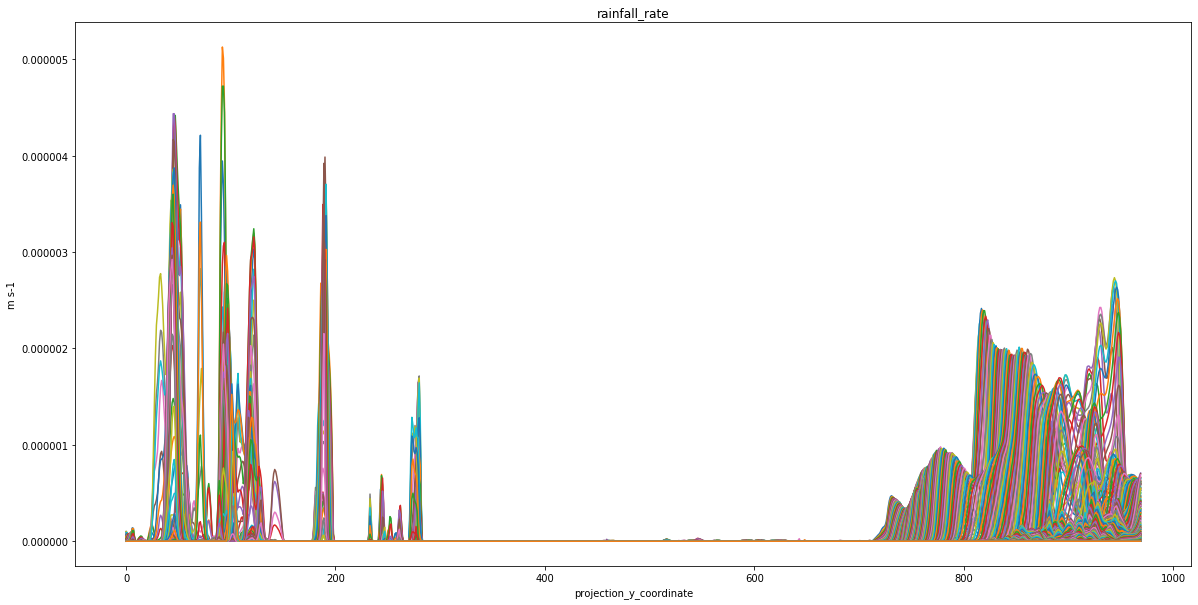

In [77]:
#Notice above
fig.suptitle('Rainfall_rate')
fig= plt.figure(figsize=(20,10))
plt.plot(cubedf)
plt.xlabel("projection_x_coordinate")
plt.ylabel(cube.units)
plt.title('rainfall_rate')
plt.legend(realization,loc = 1)
plt.show()

In [51]:
cubedf.shape,cubedf.index,cubedf.ndim,cubedf.columns[0:10],cubedf.loc[0:2]

((970, 1042),
 RangeIndex(start=0, stop=970, step=1),
 2,
 MultiIndex([(-1158000.0,),
             (-1156000.0,),
             (-1154000.0,),
             (-1152000.0,),
             (-1150000.0,),
             (-1148000.0,),
             (-1146000.0,),
             (-1144000.0,),
             (-1142000.0,),
             (-1140000.0,)],
            ),
   -1158000.0 -1156000.0 -1154000.0 -1152000.0 -1150000.0 -1148000.0  \
 0        0.0        0.0        0.0        0.0        0.0        0.0   
 1        0.0        0.0        0.0        0.0        0.0        0.0   
 2        0.0        0.0        0.0        0.0        0.0        0.0   
 
   -1146000.0 -1144000.0 -1142000.0 -1140000.0  ...  906000.0   908000.0   \
 0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
 1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
 2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
 
    910000.0   912000.0   914000.0   916000.0 

In [81]:
#replacing index with projection_y values (latitudes in RotatedGeogCS coordinates system)
cubedf = pd.DataFrame(extracted_cube.data,columns=[projection_x],index=projection_y)
cubedf.head()

,-1158000.0,-1156000.0,-1154000.0,-1152000.0,-1150000.0,-1148000.0,-1146000.0,-1144000.0,-1142000.0,-1140000.0,...,906000.0,908000.0,910000.0,912000.0,914000.0,916000.0,918000.0,920000.0,922000.0,924000.0
-1036000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1034000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1032000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1030000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1028000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


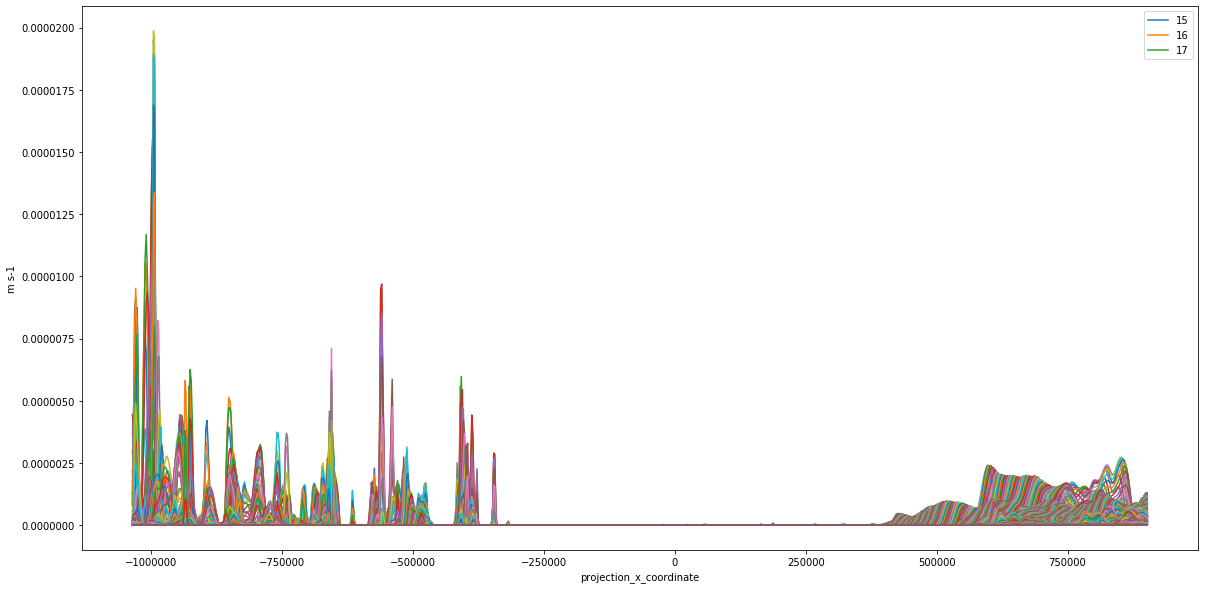

In [201]:
#plotting for all realization and downloading df_to_csv files
#this files can then be used to plot/visualize with different tools
df_to_csv = []
fig.suptitle('Rainfall_rate')
fig= plt.figure(figsize=(20,10))
for i in realization:
    extracted_cube = cube.extract(iris.Constraint(realization=i))
    cubedf = pd.DataFrame(extracted_cube.data,columns=projection_x,index=projection_y)
    cubedf.index.name = 'latitudes'
    cubedf.columns.name = 'longitudes'
    cubedf.to_csv('cubedf'+ '_' + str(i) + '.csv')
    df_to_csv.append('cubedf'+'_' + str(i) + '.csv')
    plt.plot(cubedf)
    plt.xlabel("projection_x_coordinate")
plt.ylabel(cube.units)
plt.legend(realization,loc = 1)
plt.show()

In [202]:
#looking at files downloaded and used for plot above
df_to_csv

['cubedf_15.csv', 'cubedf_16.csv', 'cubedf_17.csv']

In [203]:
#looking at one of df created
cubedf.head(2)

longitudes,-1158000.0,-1156000.0,-1154000.0,-1152000.0,-1150000.0,-1148000.0,-1146000.0,-1144000.0,-1142000.0,-1140000.0,...,906000.0,908000.0,910000.0,912000.0,914000.0,916000.0,918000.0,920000.0,922000.0,924000.0
latitudes,,,,,,,,,,,,,,,,,,,,,
-1036000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1034000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
#dataframe column names are values as in projection_x
projection_x[0:10]

array([-1158000., -1156000., -1154000., -1152000., -1150000., -1148000.,
       -1146000., -1144000., -1142000., -1140000.], dtype=float32)

In [148]:
realization

array([15, 16, 17], dtype=int32)

In [180]:
#stacking dfs into one and consolidating all realizations
extracted_cube1 = cube.extract(iris.Constraint(realization=15))
cubedf1 = pd.DataFrame(extracted_cube1.data,columns=[projection_x],index=projection_y)

In [181]:
cubedf1.columns.name,cubedf1.index.name

(None, None)

In [182]:
extracted_cube2 = cube.extract(iris.Constraint(realization=16))
cubedf2 = pd.DataFrame(extracted_cube2.data,columns=[projection_x],index=projection_y)

In [183]:
extracted_cube3 = cube.extract(iris.Constraint(realization=17))
cubedf3 = pd.DataFrame(extracted_cube3.data,columns=[projection_x],index=projection_y)

In [191]:
newdf = [cubedf1,cubedf1,cubedf2]
for df in newdf:
    df.columns = projection_x


In [192]:
newdf = pd.concat(newdf)

In [193]:
newdf.index.name = 'latitudes'
newdf.columns.name = 'longitudes'
newdf.head(2)

longitudes,-1158000.0,-1156000.0,-1154000.0,-1152000.0,-1150000.0,-1148000.0,-1146000.0,-1144000.0,-1142000.0,-1140000.0,...,906000.0,908000.0,910000.0,912000.0,914000.0,916000.0,918000.0,920000.0,922000.0,924000.0
latitudes,,,,,,,,,,,,,,,,,,,,,
-1036000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1034000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


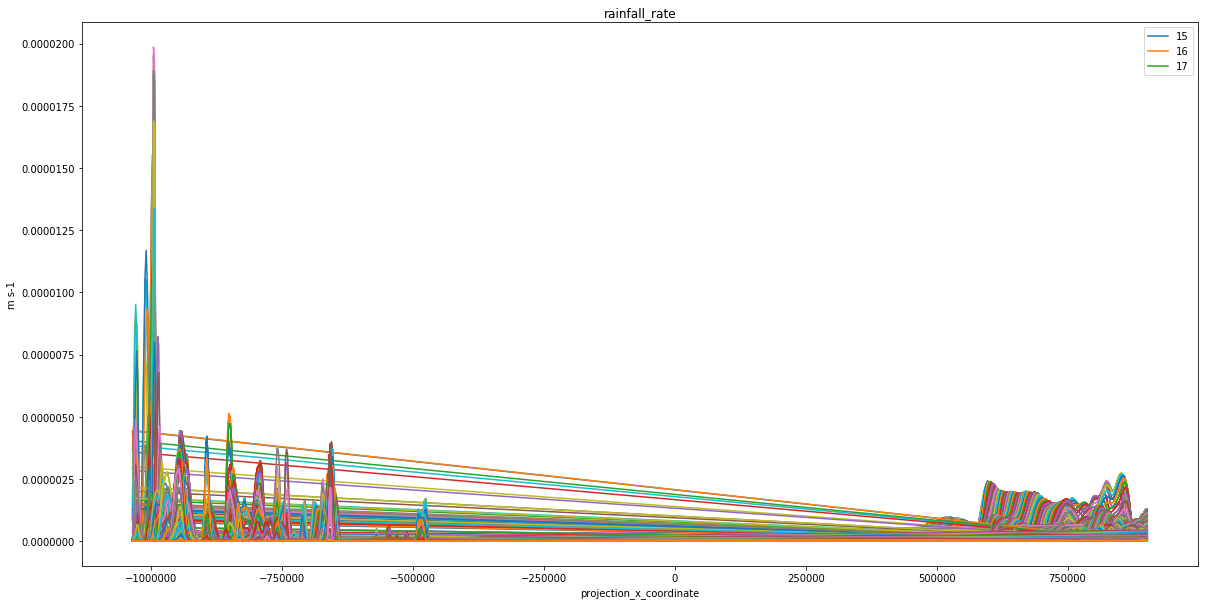

In [194]:
plt.figure(figsize=(20,10))
plt.plot(newdf)
plt.xlabel("projection_x_coordinate")
plt.ylabel(cube.units)
plt.title('rainfall_rate')
plt.legend(realization,loc = 1)
plt.show()

In [204]:
newdf.to_csv('allrealizations.csv')

In [205]:
#copy data files to s3
import boto3
s3 = boto3.client('s3',region_name='eu-west-2')
filename='allrealizations.csv'
s3.upload_file(filename, 'mogrepswrk', filename)

In [206]:
df_to_csv

['cubedf_15.csv', 'cubedf_16.csv', 'cubedf_17.csv']

In [208]:
import boto3
s3 = boto3.client('s3',region_name='eu-west-2')
for i in df_to_csv:
    s3.upload_file(i, 'mogrepswrk', i)